In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, Dataset

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
!gdown --id 1hgfcQHIlfnnDTSUAA_3--m-YA7BelKl3

Downloading...
From: https://drive.google.com/uc?id=1hgfcQHIlfnnDTSUAA_3--m-YA7BelKl3
To: /content/Dataset 3.csv
100% 999k/999k [00:00<00:00, 66.1MB/s]


In [4]:
df = pd.read_csv('Dataset 3.csv',encoding='ISO-8859-1')

In [5]:
df.head()

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [6]:
# X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 0], df.iloc[:,1], test_size=0.33, random_state=42)

In [7]:
# train_size = int(0.8 * len(df))
# test_size = len(df) - train_size
# df_train, df_test = torch.utils.data.random_split(df, [train_size, test_size])

In [8]:
df = df.sample(frac = 1)

from sklearn.model_selection import train_test_split
tweet = df['tweets'].values
label = df['sentiment'].values
tweet_train, tweet_test, label_train, label_test = train_test_split(tweet, label, test_size=0.25, random_state=1000) 

In [9]:
df.head()

,tweets,sentiment
253,@KnightTim I love you too,0
31,"it's cold, man am i loving this weather",0
92,goin abroaaaaad tomrow.. Dubaiiii Can't wait.....,0
1691,@Djalfy Nice vid!!! (More proof of insanity! ...,0
2787,Baking a cake while my baby sleeps. Tomorrow ...,0


In [10]:
# from sklearn.feature_extraction.text import CountVectorizer
# tweet_vectorizer = CountVectorizer()
# tweet_vectorizer.fit(tweet_train)
# Xcnn_train = tweet_vectorizer.transform(tweet_train)
# Xcnn_test  = tweet_vectorizer.transform(tweet_test)
# print(Xcnn_train[1])

In [11]:
 from keras.preprocessing.text import Tokenizer
 tokenizer = Tokenizer()
 tokenizer.fit_on_texts(tweet_train)
 Xcnn_train = tokenizer.texts_to_sequences(tweet_train)
 Xcnn_test = tokenizer.texts_to_sequences(tweet_test)
 vocab_size = len(tokenizer.word_index) 
 print(tweet_train[1])
 print(Xcnn_train[1]) 

@crazycool2009 LOL kk  your a cuteeeh
[5788, 54, 3801, 23, 4, 5789]


In [12]:
 from keras.preprocessing.sequence import pad_sequences
 maxlen = 150
 Xcnn_train = pad_sequences(Xcnn_train, padding='post', maxlen=maxlen)
 Xcnn_test = pad_sequences(Xcnn_test, padding='post', maxlen=maxlen)
 print(Xcnn_train[0, :]) 

[5784  423    8  171 5785   40   23 2357 5786  560  231    1   47   90
   15    7  190  125 2902  161   23  819 5787    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0]


In [13]:
from keras.models import Sequential
from keras import layers 
import tensorflow as tf

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 150, 200)          3748800   
_________________________________________________________________
conv1d (Conv1D)              (None, 149, 256)          102656    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 74, 256)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 72, 128)           98432     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 36, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 33, 64)            32832     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0

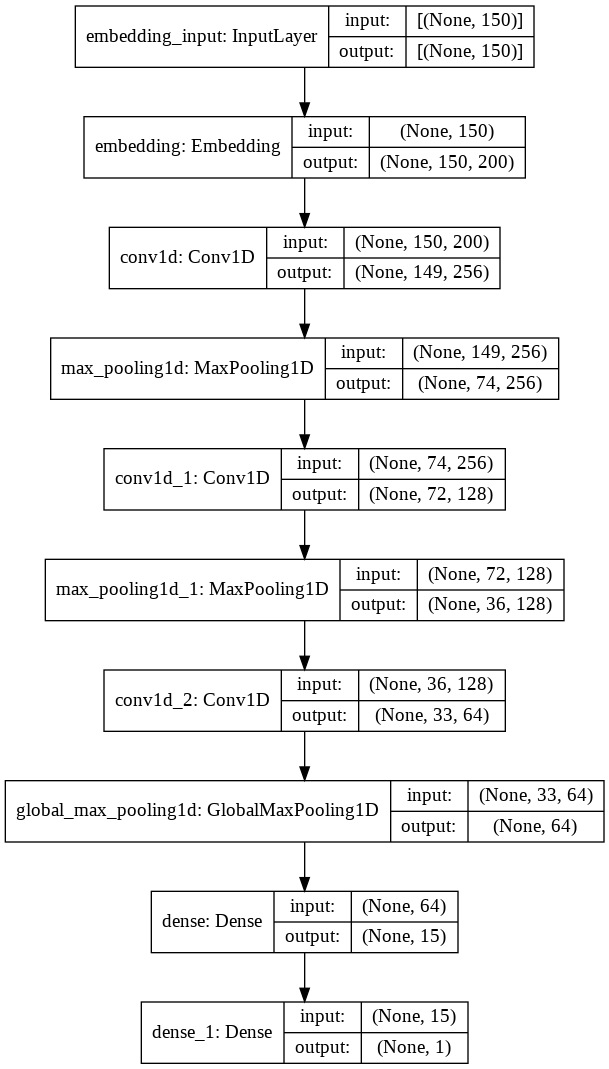

In [14]:
 embedding_dim = 200
 textcnnmodel = Sequential()
 textcnnmodel.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
 textcnnmodel.add(layers.Conv1D(filters=256, kernel_size=2, activation='relu'))
 textcnnmodel.add(layers.MaxPooling1D(pool_size = 2))
 textcnnmodel.add(layers.Conv1D(filters=128, kernel_size=3, activation='relu'))
 textcnnmodel.add(layers.MaxPooling1D(pool_size = 2))
 textcnnmodel.add(layers.Conv1D(filters=64, kernel_size=4, activation='relu'))
 textcnnmodel.add(layers.GlobalMaxPooling1D())
 textcnnmodel.add(layers.Dense(15, activation='relu'))
 textcnnmodel.add(layers.Dense(1, activation='sigmoid'))
 textcnnmodel.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
 textcnnmodel.summary() 

 tf.keras.utils.plot_model(textcnnmodel, show_shapes = True, show_layer_names = True)

In [15]:
 history = textcnnmodel.fit(Xcnn_train, label_train,
                     epochs=10,
                     verbose=True,
                     validation_data=(Xcnn_test, label_test),
                     batch_size=10)
 loss, accuracy = textcnnmodel.evaluate(Xcnn_train, label_train, verbose=False)
 print("Training Accuracy: {:.4f}".format(accuracy))
 loss, accuracy = textcnnmodel.evaluate(Xcnn_test, label_test, verbose=False)
 print("Testing Accuracy:  {:.4f}".format(accuracy)) 

Epoch 1/10
774/774 [==============================] - 41s 12ms/step - loss: 0.1093 - accuracy: 0.9563 - val_loss: 0.0374 - val_accuracy: 0.9930
Epoch 2/10
774/774 [==============================] - 9s 12ms/step - loss: 0.0109 - accuracy: 0.9975 - val_loss: 0.0432 - val_accuracy: 0.9934
Epoch 3/10
774/774 [==============================] - 9s 12ms/step - loss: 0.0045 - accuracy: 0.9986 - val_loss: 0.0528 - val_accuracy: 0.9930
Epoch 4/10
774/774 [==============================] - 9s 11ms/step - loss: 8.7988e-04 - accuracy: 0.9996 - val_loss: 0.0656 - val_accuracy: 0.9926
Epoch 5/10
774/774 [==============================] - 9s 12ms/step - loss: 4.8224e-04 - accuracy: 0.9997 - val_loss: 0.0921 - val_accuracy: 0.9919
Epoch 6/10
774/774 [==============================] - 9s 12ms/step - loss: 0.0153 - accuracy: 0.9978 - val_loss: 0.0606 - val_accuracy: 0.9938
Epoch 7/10
774/774 [==============================] - 9s 11ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 0.0644 - val_accurac

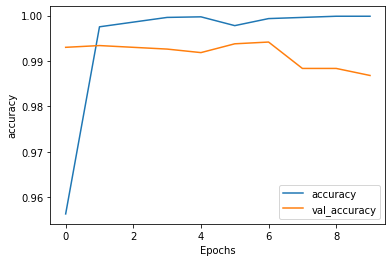

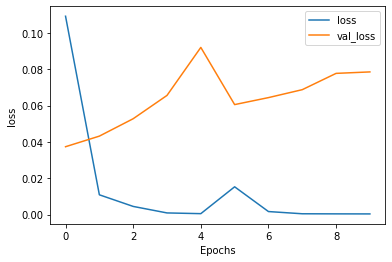

In [16]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [17]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

y_pred = textcnnmodel.predict(Xcnn_train)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = textcnnmodel.evaluate(Xcnn_train, label_train, verbose = 1)




242/242 [==============================] - 1s 5ms/step - loss: 2.9931e-04 - accuracy: 0.9999


In [18]:
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(label_train, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(label_train, y_pred))
print('Train Recall:', recall_score(label_train, y_pred))
print('Train F1-score:', f1_score(label_train, y_pred))

Train Loss: 0.0002993078960571438
Train Accuracy: 0.9998707175254822 (Model Metric)
Train Accuracy: 0.9998707175177763 (sklearn Metric)
Train Precision: 0.9994232987312572
Train Recall: 1.0
Train F1-score: 0.9997115661955581


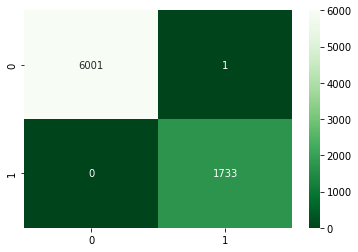

In [19]:
sns.heatmap(confusion_matrix(label_train, y_pred), annot = True, fmt = 'g', cmap='Greens_r')

In [20]:
y_pred = textcnnmodel.predict(Xcnn_test)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

Test Accuracy: 0.986816595579682 (sklearn Metric)


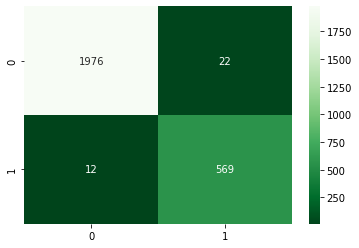

In [21]:
print('Test Accuracy:', accuracy_score(label_test, y_pred), '(sklearn Metric)')
sns.heatmap(confusion_matrix(label_test, y_pred), annot = True, fmt = 'g', cmap='Greens_r')